In [74]:
#importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [75]:
df = pd.read_excel('ndf_dolar.xlsx') #, index_col='inicio')

In [76]:
df.dtypes

inicio              datetime64[ns]
vencimento          datetime64[ns]
prazo                        int64
volume_brl                   int64
volume_usd                 float64
volume_usd_sinal           float64
usd                        float64
compra_venda                object
dtype: object

In [77]:
df

,inicio,vencimento,prazo,volume_brl,volume_usd,volume_usd_sinal,usd,compra_venda
0,2020-06-24,2020-11-29,158,221204805,1.150265e+09,1.150265e+09,5.200000,compra
1,2020-03-19,2020-12-22,278,194843153,1.008933e+09,-1.008933e+09,5.178182,venda
2,2020-02-06,2021-02-24,384,120383012,6.251891e+08,-6.251891e+08,5.193333,venda
3,2020-06-16,2021-08-29,439,162119829,8.383599e+08,8.383599e+08,5.171236,compra
4,2020-03-10,2021-04-04,390,23438449,1.212118e+08,1.212118e+08,5.171494,compra
...,...,...,...,...,...,...,...,...
194,2020-06-08,2020-12-26,201,184091103,9.518479e+08,-9.518479e+08,5.170526,venda
195,2020-05-22,2020-08-07,77,169971519,8.808302e+08,8.808302e+08,5.182222,compra
196,2020-05-20,2021-12-03,562,255153047,1.320515e+09,1.320515e+09,5.175385,compra
197,2020-03-19,2021-03-05,351,172023957,8.853801e+08,-8.853801e+08,5.146842,venda


In [78]:
#volume por data
vol_data = df[['inicio','vencimento','volume_usd']].groupby(['inicio','vencimento']).sum()
vol_data

volume_usd
inicio     vencimento              
2020-01-01 2021-05-14  8.122063e+08
2020-01-02 2020-11-09  1.127713e+09
           2021-04-06  4.423128e+08
2020-01-03 2021-03-28  1.062712e+09
2020-01-04 2021-08-16  1.136695e+09
...                             ...
2020-06-25 2021-09-24  1.763102e+08
2020-06-27 2020-10-07  1.263717e+09
2020-06-29 2020-11-20  1.197887e+09
           2021-11-05  1.890257e+08
2020-06-30 2021-03-19  5.275747e+08

[199 rows x 1 columns]

In [72]:
compra = df[(df['compra_venda']=='compra')]
compra = compra[['inicio','vencimento','volume_usd','compra_venda']] #.groupby(['inicio','vencimento']).sum()
compra

,inicio,vencimento,volume_usd,compra_venda
0,2020-04-22,2021-03-20,1.247513e+09,compra
3,2020-03-30,2021-11-06,5.078737e+08,compra
4,2020-06-14,2021-12-15,1.378534e+09,compra
7,2020-04-25,2021-12-18,1.787667e+07,compra
8,2020-01-19,2020-09-30,6.305117e+08,compra
...,...,...,...,...
191,2020-06-07,2021-07-12,4.564594e+08,compra
192,2020-03-16,2021-07-02,1.130619e+09,compra
193,2020-04-13,2021-07-02,1.117778e+09,compra
195,2020-01-06,2020-11-12,4.427906e+08,compra


In [62]:
#def teste():
    #for i in df['volume']:
     #   if (df['compra_venda'] == 'compra'):
      #      return df['volume1'] = df[1
       # else:
        #    return df['volume1'] = 0


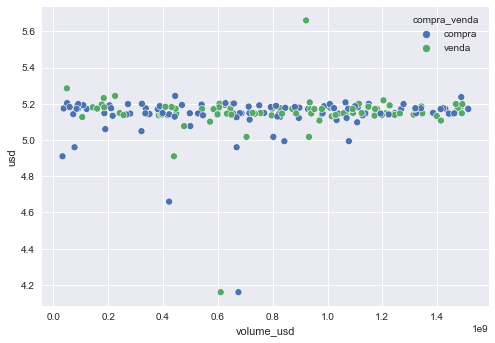

In [81]:
#disperssão volume x usd
fig = sns.scatterplot(data=df, x='volume_usd', y='usd', hue='compra_venda')
plt.show(fig)

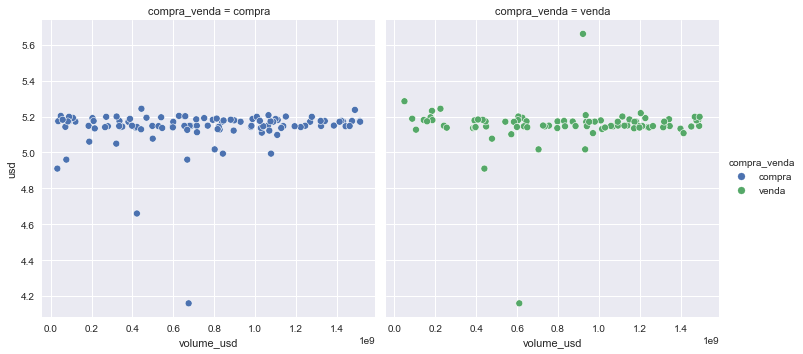

In [83]:
#disperssão volume x usd separado em dois gráficos
fig = sns.relplot(data=df, x='volume_usd', y='usd', hue='compra_venda', col='compra_venda')
plt.show(fig)

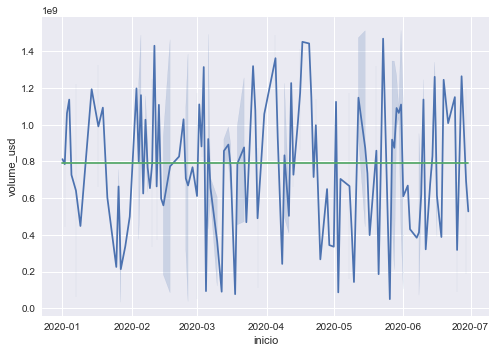

In [101]:
#comportamento do volume dos contratos ao longo do tempo e linha média 
fig1 = sns.lineplot(data=df, x='inicio', y= 'volume_usd')
fig2 = sns.lineplot(data=df, x='inicio', y= df['volume_usd'].mean())
plt.show(fig1,fig2)

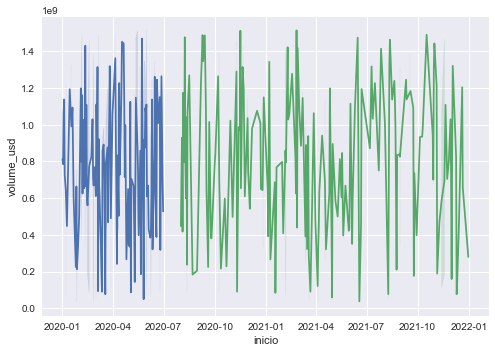

In [108]:
#comportamento do volume de inicio e vencimento ao longo do tempo 
fig1 = sns.lineplot(data=df, x='inicio', y= 'volume_usd')
fig2 = sns.lineplot(data=df, x='vencimento', y= 'volume_usd')
plt.show(fig1,fig2)

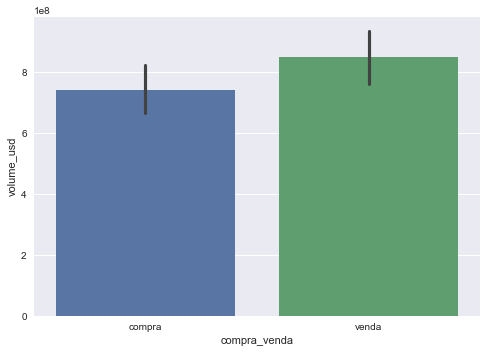

In [110]:
#volume de compra e venda
fig = sns.barplot(data=df, x='compra_venda', y='volume_usd')
plt.show(fig)

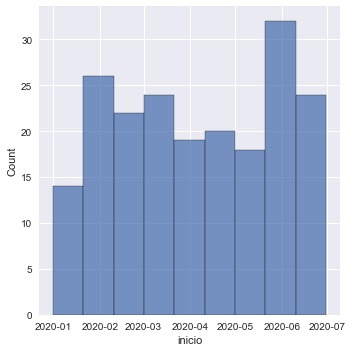

In [111]:
#histograma do inicio de contrato
fig = sns.displot(data = df, x='inicio')
plt.show(fig)

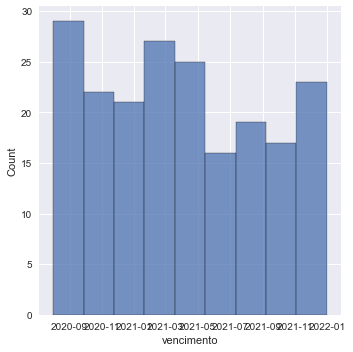

In [112]:
#histograma do vencimento de contrato
fig = sns.displot(data = df, x='vencimento')
plt.show(fig)

<Figure size 1008x360 with 0 Axes>

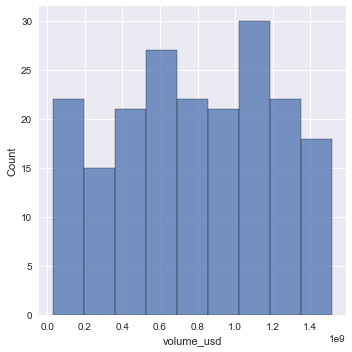

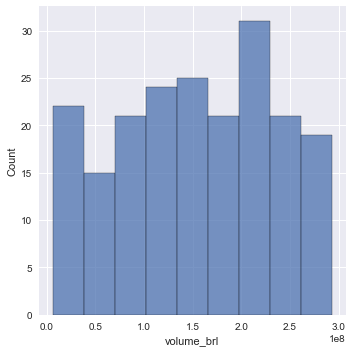

In [134]:
#histograma do vencimento de contrato
plt.figure(figsize=(14,5))
fig1 = sns.displot(data = df, x='volume_usd')
fig2 = sns.displot(data = df, x='volume_brl')
plt.show(fig1,fig2)

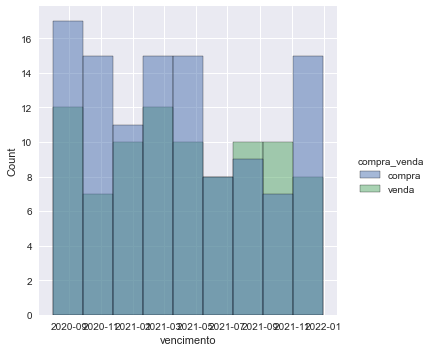

In [115]:
#histograma do vencimento de contrato
fig = sns.displot(data = df, x='vencimento', hue='compra_venda')
plt.show(fig)

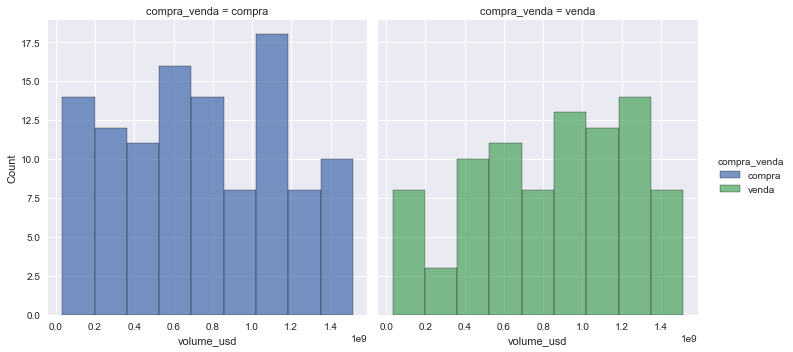

In [118]:
#histograma do volume de contrato
fig = sns.displot(data = df, x='volume_usd', hue='compra_venda', col ='compra_venda')
plt.show(fig)

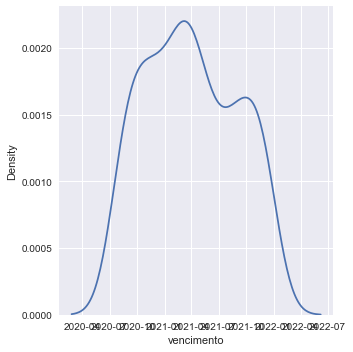

In [113]:
#densidade do vencimento de contrato
fig = sns.displot(data = df, x='vencimento', kind = 'kde')
plt.show(fig)

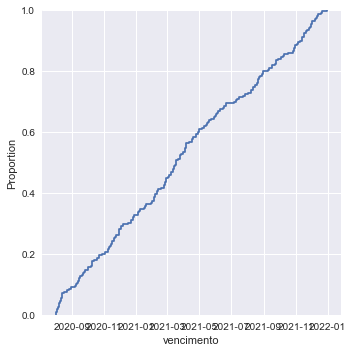

In [114]:
#proporção no tempo do vencimento de contrato
fig = sns.displot(data = df, x='vencimento', kind='ecdf')
plt.show(fig)

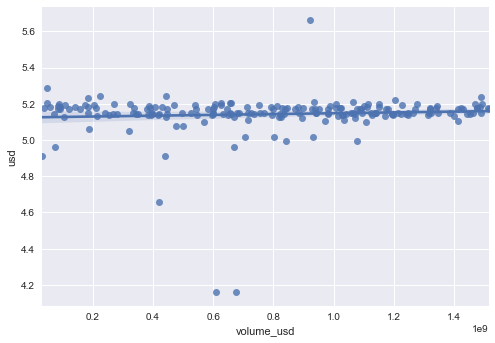

In [121]:
#regressão linear no tempo do inicio de contrato com o montante
fig = sns.regplot(data = df, x='volume_usd', y='usd')
plt.show(fig)

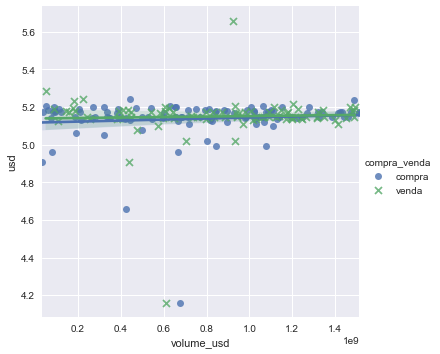

In [123]:
#regressão linear no tempo do inicio de contrato com o montante
fig = sns.lmplot(data = df, x='volume_usd', y='usd', hue='compra_venda', markers= ['o','x'])
plt.show(fig)

In [125]:
#tornando a coluna inicio como index
df.set_index('inicio', inplace=True)

In [135]:
mes = df.resample('1M').mean()
mes.head(5)

,prazo,volume_brl,volume_usd,volume_usd_sinal,usd
inicio,,,,,
2020-01-31,440.571429,1.361587e+08,7.010682e+08,2.424553e+08,5.142238
2020-02-29,388.410256,1.588644e+08,8.195026e+08,1.511012e+08,5.159110
2020-03-31,391.222222,1.455680e+08,7.520725e+08,-1.594407e+08,5.169238
2020-04-30,319.862069,1.802385e+08,9.155321e+08,-2.097166e+08,5.123496
2020-05-31,351.717949,1.599567e+08,8.244987e+08,1.145161e+08,5.149709


In [136]:
net = mes.volume_usd - mes.volume_brl
net

inicio
2020-01-31    5.649094e+08
2020-02-29    6.606381e+08
2020-03-31    6.065044e+08
2020-04-30    7.352936e+08
2020-05-31    6.645420e+08
2020-06-30    5.671458e+08
Freq: M, dtype: float64

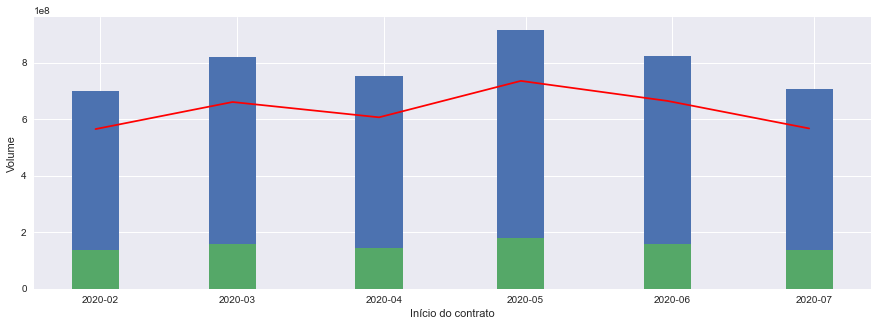

In [143]:
# gráfico de barras
plt.figure(figsize=(15,5))
fig1 = plt.bar(mes.index, mes.volume_usd, width=10) # ou df.inicio.dt.month
fig2 = plt.bar(mes.index, mes.volume_brl, width=10)
fig3 = plt.plot(mes.index, net, color='red')
#fig4 = plt.plot(mes.index, mes.volume_usd.mean())
plt.xlabel('Início do contrato')
plt.ylabel('Volume')
plt.show()

In [144]:
import numpy as np
#data=pd.DataFrame(valores)
labels = list(df.inicio)
vol_usd = list(round(df['volume_usd'],2))
vol_brl = list(round(data['volume_brl'],2))

x = np.arange(len(labels))

fig, ax = plt.subplots()

rects1 = ax.bar(x , vol_usd, width=0.1, label='Volume USD')
rects2 = ax.bar(x+0.1, vol_brl, width=0.1, label='Volume BRL')
g1 = plt.plot(df['inicio'], net, label = 'Diferença', color = 'gray', marker='o')

#adicionando o nome das labels, titulo, etc.
ax.set_title('Volume') 
ax.set_xticks(x)
ax.set_xticklabels(labels) 
ax.legend()
plt.show()

AttributeError: 'DataFrame' object has no attribute 'inicio'